# Clustering

Marina Márquez Macías<br>
22 Enero 2024

Vamos a aplicar aprendizaje automático no supervisado. Para empezar, vamos a importar las librerías que serán necesarias.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Apartado 1

A partir de una imagen fotográfica médica, aplicar segmentación de colores,
explicando cómo el clustering puede ayudar al diagnóstico médico.

Importamos la fotografía médica a la que le vamos a aplicar la segmentación de colores. Se trata de una resonancia magnética del cerebro.

In [3]:
from sklearn.cluster import KMeans

In [4]:
from IPython.display import Image

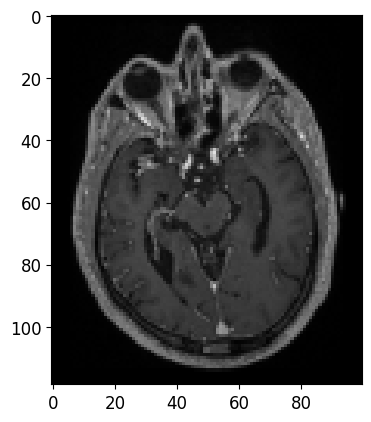

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import urllib.request

# Definimos la ruta de la imagen y la carpeta
image_folder = "images"
sub_folder = "unsupervised_learning"
image_filename = "cerebrix.png"

# Creamos la ruta donde guardaremos la imagen
image_path = os.path.join(image_folder, sub_folder, image_filename)

# URL de la imagen en GitHub
image_url = "https://raw.githubusercontent.com/ivmartel/dwv/develop/tests/pacs/images/cerebrix.png"

# Descargamos la imagen
if not os.path.exists(image_path):
    os.makedirs(os.path.dirname(image_path), exist_ok=True)
    urllib.request.urlretrieve(image_url, image_path)

# Mostrar la imagen com imshow
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

Podemos observar las dimensiones de la imagen. La imagen tiene 119x100 píxeles, y cada píxel está representado por una cuaterna, la cual representa los tres canales de colores (RGB), y el último valor de todas estas cuaternas es un 1. Se puede observar que los valores ya están normalizados.

In [6]:
image.shape

(119, 100, 4)

In [7]:
image[58]

array([[0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.00392157, 0.00392157, 0.00392157, 1.        ],
       [0.11372549, 0.11372549, 0.11372549, 1.        ],
       [0.47058824, 0.47058824, 0.47058824, 1.        ],
       [0.41960785, 0.41960785, 0.41960785, 1.        ],
       [0.31764707, 0.31764707, 0.31764707, 1.        ],
       [0.4       , 0.4       , 0.4       , 1.        ],
       [0.34901962, 0.34901962, 0.34901962, 1.        ],
       [0.3254902 , 0.3254902 , 0.3254902 , 1.        ],
       [0.33333334, 0.33333334, 0.33333334, 1.        ],
       [0.1764706 , 0.1764706 , 0.1764706 , 1.        ],
       [0.10588235, 0.10588235, 0.10588235, 1.        ],
       [0.32941177, 0.32941177,

Vamos a representar la imagen como una lista de píxeles, representando cada píxel con su correspondiente cuaterna.

In [8]:
X_cerebro = image.reshape(-1, 4)
X_cerebro

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [9]:
X_cerebro.shape

(11900, 4)

Vamos ahora a aplicar un algoritmo de clustering sobre ese array, donde el número de clusters será el número de colores en el que queremos segmentar la imagen. En este caso van a ser 8 colores. Luego sustituiremos cada píxel por el centro del clúster que se le ha asignado, y reestructuraremos el resultado como un array 3D de nuevo. La técnica de clustering que usaremos será K-medias.

In [10]:
kmeans_cerebro = KMeans(n_clusters=8, random_state=42).fit(X_cerebro)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
kmeans_cerebro.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Los cluster posibles asignados a cada píxel toman valores de 0 a 7.

In [12]:
set(kmeans_cerebro.labels_.tolist())

{0, 1, 2, 3, 4, 5, 6, 7}

Los centros calculados los tenemos en `cluster_centers`, y serían los colores representativos de cada cluster y el valor 1 al final de cada cuaterna:

In [13]:
kmeans_cerebro.cluster_centers_

array([[0.00442688, 0.00442688, 0.00442688, 1.        ],
       [0.2209447 , 0.2209447 , 0.2209447 , 1.        ],
       [0.37121007, 0.37121007, 0.37121007, 1.        ],
       [0.6297682 , 0.6297682 , 0.6297682 , 1.        ],
       [0.15332977, 0.15332977, 0.15332977, 1.        ],
       [0.28171384, 0.28171384, 0.28171384, 1.        ],
       [0.08065703, 0.08065703, 0.08065703, 1.        ],
       [0.4660341 , 0.4660341 , 0.4660341 , 1.        ]], dtype=float32)

Ahora vamos a obtener la imagen segmentada. Para ello, por cada pixel nos quedamos con el color representante de su clúster, y volvemos a las dimensiones originales:

In [14]:
segmented_img = kmeans_cerebro.cluster_centers_[kmeans_cerebro.labels_]
segmented_img = segmented_img.reshape(image.shape)

Representamos la imagen segmentada con `imshow`.

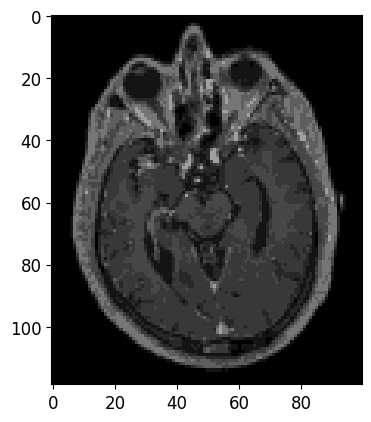

In [15]:
plt.imshow(segmented_img)

Podemos obtener distintas imágenes segmentadas con menos colores. Vamos a obtener las imágenes segmentadas con 6, 4 y 2 colores.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


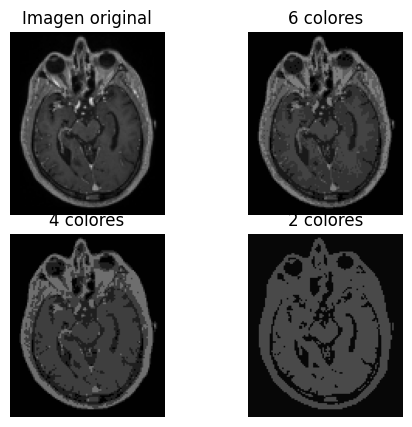

In [16]:
segmented_imgs = []
n_colors = (6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X_cerebro)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(6,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(221)
plt.imshow(image)
plt.title("Imagen original")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(222 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colores".format(n_clusters))
    plt.axis('off')

plt.savefig('./images/unsupervised_learning/image_segmentation_diagram')
plt.show()

Como podemos observar, las técnicas de
clustering puede utilizarse para segmentar imágenes médicas en regiones de interés, como tumores, órganos o tejidos específicos. Al agrupar píxeles o regiones similares en clusters, se puede identificar y delinear con mayor precisión las áreas de interés en la imagen.

## Apartado 2

Generar con make moons de scikit learn (con noise=0) un conjunto de 10000 datos con dos clases, separar en entrenamiento y prueba, y aprender un clasificador MLP. Tratar de mejorar el rendimiento aplicando previamente una
transformación basada en K-medias, tal y como se ha explicado en el material
de clase.

Para empezar, vamos a generar el conjunto de datos con el que vamos a trabajar con la función `make_moons`.

In [17]:
X, y = make_moons(n_samples=10000, noise=0,  random_state=42)

Visualizamos nuestro conjunto gráficamente.

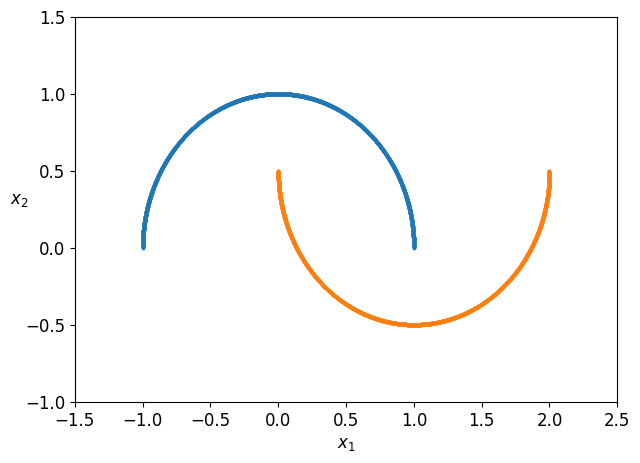

In [18]:
plt.rcParams["figure.figsize"] = (7,5)
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], s=2)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1],s=2)


plt.axis([-1.5, 2.5, -1, 1.5])

plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
plt.show()

Separamos en conjuntos de entrenamiento y prueba.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos con MLPClassifier y vemos el rendimiento sin aplicar el algoritmo K-medias.

In [20]:
mlp = MLPClassifier(solver="lbfgs",random_state=0,activation='relu',
                    max_iter = 5000,hidden_layer_sizes=(10,))
mlp.fit(X_train, y_train)

print("Rendimiento en entrenamiento: {:.3f}".format(
    mlp.score(X_train, y_train)))
print("Rendimiento en el conjunto de prueba: {:.3f}".format(mlp.score(X_test, y_test)))
print("Rendimiento en el conjunto total: {:.3f}".format(mlp.score(X,y)))

Rendimiento en entrenamiento: 0.894
Rendimiento en el conjunto de prueba: 0.906
Rendimiento en el conjunto total: 0.896


Aplicamos el algoritmo K-Medias a los conjuntos de entrenamiento y prueba.

In [21]:
kmeans = KMeans(n_clusters=2, random_state=5)
X_kmeans= kmeans.fit_transform(X)
X_train_kmeans = kmeans.fit_transform(X_train)
X_test_kmeans = kmeans.transform(X_test)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Observamos las predicciones de las 10 primeras instancias después de haber aplicado el algoritmo K-medias.

In [ ]:
y_kmeans[:10]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

In [ ]:
y[:10]

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0])

Como se puede observar, algunas etiquetas no coinciden. Representamos gráficamente los dos clusteres obtenidos con la función `dibuja_clusteres`.

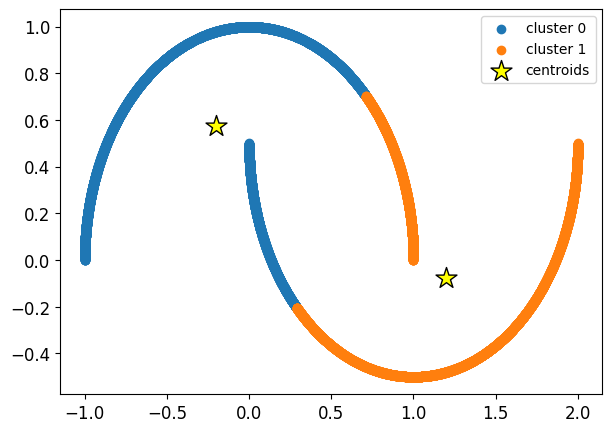

In [23]:
plt.figure(figsize=(7,5))
def dibuja_clusters(model,Xs,ys):
    for i in range(max(ys)+1):
        plt.scatter(Xs[ys==i,0], Xs[ys==i,1],label='cluster ' + str(i))
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, marker='*',
    c='yellow', edgecolor='black',label='centroids')
    plt.legend()
    plt.show()

dibuja_clusters(kmeans,X,y_kmeans)

Entrenamos el conjunto después de haber aplicado el algoritmo K-Medias y vemos su rendimiento.

In [24]:
mlp_km = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
mlp_km.fit(X_train_kmeans, y_train)
print("Rendimiento en entrenamiento: {:.3f}".format(
    mlp_km.score(X_train_kmeans, y_train)))
print("Rendimiento en el conjunto de prueba: {:.3f}".format(mlp_km.score(X_test_kmeans, y_test)))
print("Rendimiento en el conjunto total: {:.3f}".format(mlp_km.score(X_kmeans,y)))

Rendimiento en entrenamiento: 0.999
Rendimiento en el conjunto de prueba: 0.999
Rendimiento en el conjunto total: 0.996


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Se puede observar que el rendimiento ha mejorado considerablemente. A continuación, calculamos las predicciones del conjunto de test después de haber aplicado el algoritmo de clustering.

In [ ]:
y_pred = mlp_km.predict(X_test_kmeans)

Representamos los conjuntos de entrenamiento antes y después de haber aplicado K-medias.

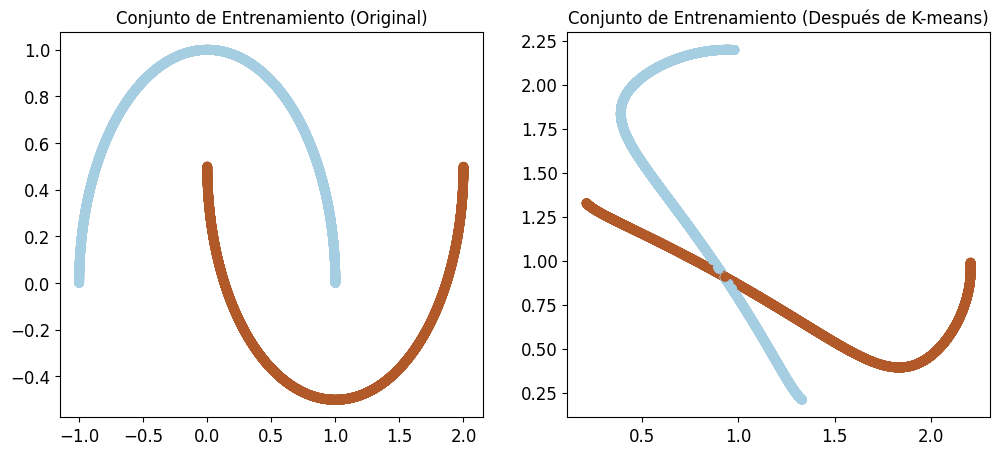

In [ ]:
# Visualización opcional
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("Conjunto de Entrenamiento (Original)")

plt.subplot(1, 2, 2)
plt.scatter(X_train_kmeans[:, 0], X_train_kmeans[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("Conjunto de Entrenamiento (Después de K-means)")

plt.show()

In [ ]:
kmeans.cluster_centers_

array([[-0.19868942,  0.57620328],
       [ 1.20036829, -0.07698711]])

## Apartado 3

 Elegir una base de datos del repositorio de la Universidad de California (accesible en https://archive.ics.uci.edu/datasets) distinto a la base
de datos elegida para el estudio con árboles de decisión y MLP y
reproducir el ejercicio de aprendizaje semi-supervisado que se explica en el
material visto en clase.

La base de datos escogida es `The Olivetti faces dataset` de `Scikit-learn`. En esta base de datos, hay 400 instancias, las cuales son imágenes de personas. Las etiquetas de clasificación son los números enteros de 0 a 39. Cada entero representa a una persona. Cada imagen tiene 4096 atributos, cada uno representando a un píxel, ya que las imágenes son de dimensión 64x64 píxeles. Los valores de los atributos están en el intervalo [0,1], y miden la instensidad del píxel en la escala de grises. Se puede observar que estos valores ya estñan normalizados. Cargamos esta base de datos y la entrenamos con la función `train_test_split`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
X_faces, y_faces = fetch_olivetti_faces(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train_faces, X_test_faces, y_train_faces, y_test_faces = train_test_split(X_faces, y_faces, random_state=42)

Observamos las dimensiones de nuestros datos: hay 400 instancias (imágenes) con 4096 atributos cada una (píxeles).

In [ ]:
X_faces.shape

In [ ]:
X_faces[0]

Observamos las 100 primeras etiquetas de clasificación. Se puede notar que las 100 primeras imágenes son de las personas  asociadas con los enteros 0 hasta 9.

In [ ]:
y_faces[0:99]

Vamos a ver el comportamiento de un clasificador mediante regresión logística. Para ello importamos el módulo `LogisticRegression` de `Scikit-learn`.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_faces, y_train_faces)

log_reg_score = log_reg.score(X_test_faces, y_test_faces)
log_reg_score

Como podemos ver, se obtiene un rendimiento bastante alto. Vamos a pasar ahora a hacer aprendizaje semi-supervisado. Es decir, vamos a suponer que sólo están etiquetadas un número determinado de imágenes. En nuestro caso 70 imágenes, y vamos a ver cómo varía el rendimiento. Empezamos entrenando un clasificador de regresión logística con sólo las 70 primeras imágenes de la base de datos etiquetadas.

In [ ]:
n_labeled = 70

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train_faces[:n_labeled], y_train_faces[:n_labeled])
log_reg.score(X_test_faces, y_test_faces)

Notamos que el rendimiento ha disminuido bastante. Para mejorarlo, vamos a aplicar clustering con k=70, y luego hallaremos las imágenes representativas de cada centro (la instancia más cercana a este).

In [ ]:
k=70
kmeansc = KMeans(n_clusters=k, random_state=67)
X_faces_dist = kmeansc.fit_transform(X_train_faces)               # distancia de cada imagen a cada centro
representative_faces_idx = np.argmin(X_faces_dist, axis=0) # para cada centro, la posición
                                                            # de la imagen más cercana (representativa)
X_representative_faces = X_train_faces[representative_faces_idx] # array con las imágenes representativas

In [ ]:
X_representative_faces

Podemos ver estas imágenes representativas.

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_cancer in enumerate(X_representative_faces):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_cancer.reshape(64, 64), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.savefig('./images/unsupervised_learning/representative_images_diagram')
plt.show()

Como no tenemos los datos de a qué personas pertenecen esas imágenes representativas, vamos a calcular sus etiquetas de la siguiente manera.

In [ ]:
y_representative_faces=y_train_faces[representative_faces_idx]
X_representative_faces = X_train_faces[representative_faces_idx]
y_representative_faces

Una vez que tenemos las imágenes representativas etiquetadas, vamos a entrenar de nuevo un clasificador de regresión logística, esperando que mejore el rendimiento.

In [ ]:
X_representative_faces = X_train_faces[representative_faces_idx]

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=200 ,random_state=98)
log_reg2.fit(X_representative_faces, y_representative_faces)
log_reg2.score(X_test_faces, y_test_faces)

Podemos observar que el rendimiento ha mejorado bastante, pues ha pasado de $0.56$ a $0.74$. Veamos ahora qué pasa si propaganmos el valor de clasificación desde las imágenes representativas, a las que están en el mismo clúster:

In [ ]:
y_train_propagated = np.empty(len(X_train_faces), dtype=np.int32)
for i in range(k):   # en cada cluster asignamos la clase del correspondiente representativo
    y_train_propagated[kmeansc.labels_==i] = y_representative_faces[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=50000, random_state=97)
log_reg3.fit(X_train_faces, y_train_propagated)
log_reg3.score(X_test_faces, y_test_faces)

El rendimiento no disminuye, pero tampoco mejora. Vamos a propagar la clasificación desde las imágenes representativas, al 70% de las que están más cercanas a ellas:

In [ ]:
percentile_closest = 70

X_cluster_dist = X_faces_dist[np.arange(len(X_train_faces)), kmeansc.labels_] # distancia al centro más cercano
for i in range(k):     # Para cada clúster
    in_cluster = (kmeansc.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster] # distancias dentro de ese grupo
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) # percentil
    above_cutoff = (X_cluster_dist > cutoff_distance) # las que quedan fuera del percentil las ponemos a -1
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train_faces[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg4 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=79)
log_reg4.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg4.score(X_test_faces, y_test_faces)

El rendimiento ha mejorado pero no considerablemente. Esto puede deberse a que un porcentaje de las etiquetas se han propagado correctamente, en concreto un 87%. Esto se ha dado gracias al clustering, que ha clasificado bien en un 87% de los casos a las imágenes.

In [ ]:
np.mean(y_train_partially_propagated == y_train_faces[partially_propagated])